# Camp 2 Max 1

# Error bar

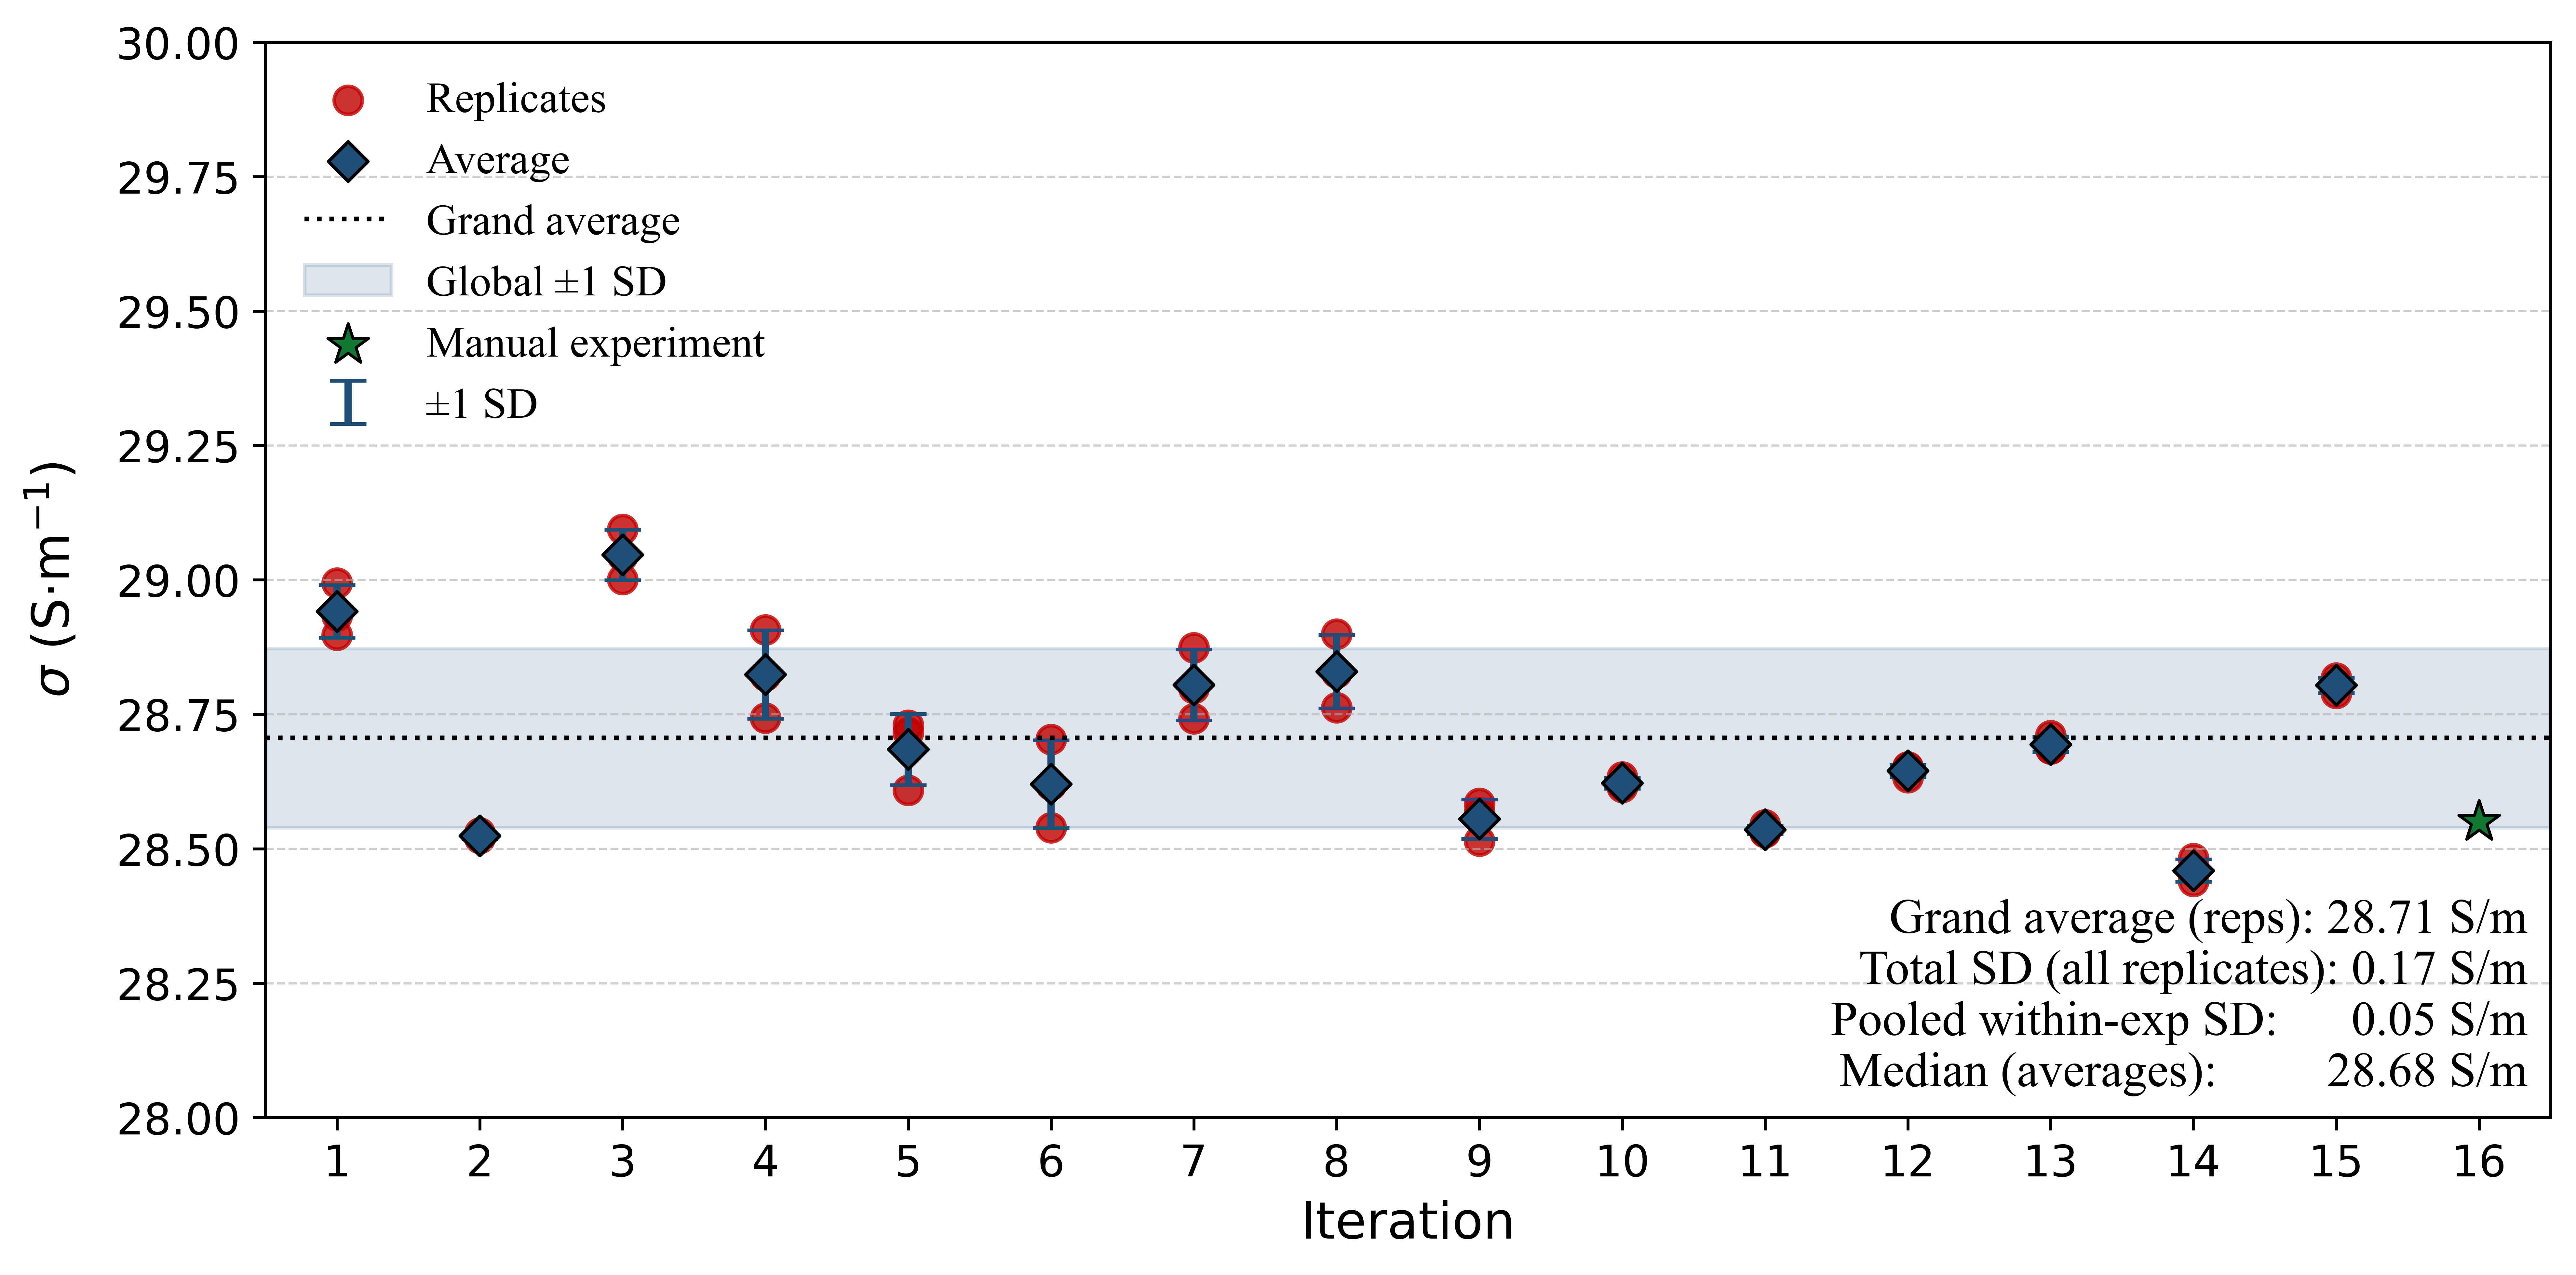

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_path    = "./Campaign2MaxEval.csv"
R           = 3
start_exp   = 1
N_exp       = None
iter_offset = 0

fig_w, fig_h = 10, 5
fig_dpi      = 800
rep_color    = "#C00000"
mean_color   = "#1f4e79"
fs_labels, fs_ticks, fs_leg = 14, 12, 20
ylabel       = r"$\sigma$ (S·m$^{-1}$)"
ylim         = (28, 30)

def load_matrix_onecol(path, R):
    flat = pd.read_csv(path, header=None).values.flatten().astype(float)
    if len(flat) % R != 0:
        raise ValueError(f"{path}: row count ({len(flat)}) is not a multiple of R={R}.")
    return flat.reshape(-1, R)

mat_all = load_matrix_onecol(csv_path, R)
n_groups_total = mat_all.shape[0]
start_idx0 = start_exp - 1
end_idx = (n_groups_total if N_exp is None else min(start_idx0 + N_exp, n_groups_total))
data = mat_all[start_idx0:end_idx]
N = data.shape[0]

means = data.mean(axis=1)
stds  = data.std(axis=1, ddof=1)
pooled_within_sd = float(np.sqrt(np.mean(stds**2)))


xs    = np.arange(start_exp + iter_offset, start_exp + iter_offset + N)

grand_mean_reps = data.ravel().mean()
grand_sd_reps   = data.ravel().std(ddof=1)
total_sd = float(grand_sd_reps) 
mean_of_means   = means.mean()
sd_of_means     = means.std(ddof=1)
med_of_means    = np.median(means)

fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=fig_dpi)

for i, xi in enumerate(xs):
    ax.scatter(np.full(R, xi), data[i], color=rep_color, s=60, alpha=0.8, marker='o',
               label="Replicates" if i == 0 else None)

ax.scatter(xs, means, color=mean_color, s=60, marker='D', edgecolor='black',
           linewidth=0.9, label="Average", zorder=3)

ax.errorbar(xs, means, yerr=stds, fmt='none', ecolor=mean_color, elinewidth=2,
            capsize=5, zorder=2, label="±1 SD")

left, right = xs[0] - 0.5, xs[-1] + 0.5 + 1
ax.axhline(grand_mean_reps, color="black", linestyle=":", linewidth=1.3, label="Grand average")
ax.fill_between([left, right],
                [grand_mean_reps - grand_sd_reps, grand_mean_reps - grand_sd_reps],
                [grand_mean_reps + grand_sd_reps, grand_mean_reps + grand_sd_reps],
                color=mean_color, alpha=0.15, zorder=0, label="Global ±1 SD")

special_iter = 16
ax.scatter(
    special_iter, 28.55,
    color="#117733", s=140, marker='*',
    edgecolor="black", linewidth=0.8,
    label="Manual experiment"
)


ax.set_xlabel("Iteration", fontsize=fs_labels)
ax.set_ylabel(ylabel, fontsize=fs_labels, labelpad=10)
ax.set_xlim(left, right)
ax.set_xticks(np.append(xs, special_iter))
ax.tick_params(axis="both", labelsize=fs_ticks)
ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)

ax.legend(frameon=False, loc="upper left", prop={'family': 'Times New Roman', 'size': fs_leg-8})

if ylim is not None:
    ax.set_ylim(*ylim)

text = (f"Grand average (reps): {grand_mean_reps:.2f} S/m\n"
        f"Total SD (all replicates): {total_sd:.2f} S/m\n"
        f"Pooled within-exp SD:      {pooled_within_sd:.2f} S/m\n"
        f"Median (averages):         {med_of_means:.2f} S/m")


ax.text(0.99, 0.02, text, transform=ax.transAxes, ha="right", va="bottom",
        fontsize=13.5, fontfamily='Times New Roman', bbox=dict(boxstyle="round", fc="white", ec="none", alpha=0))


plt.tight_layout()
plt.show()
